# **TITANIC SURVIVAL PREDICTION**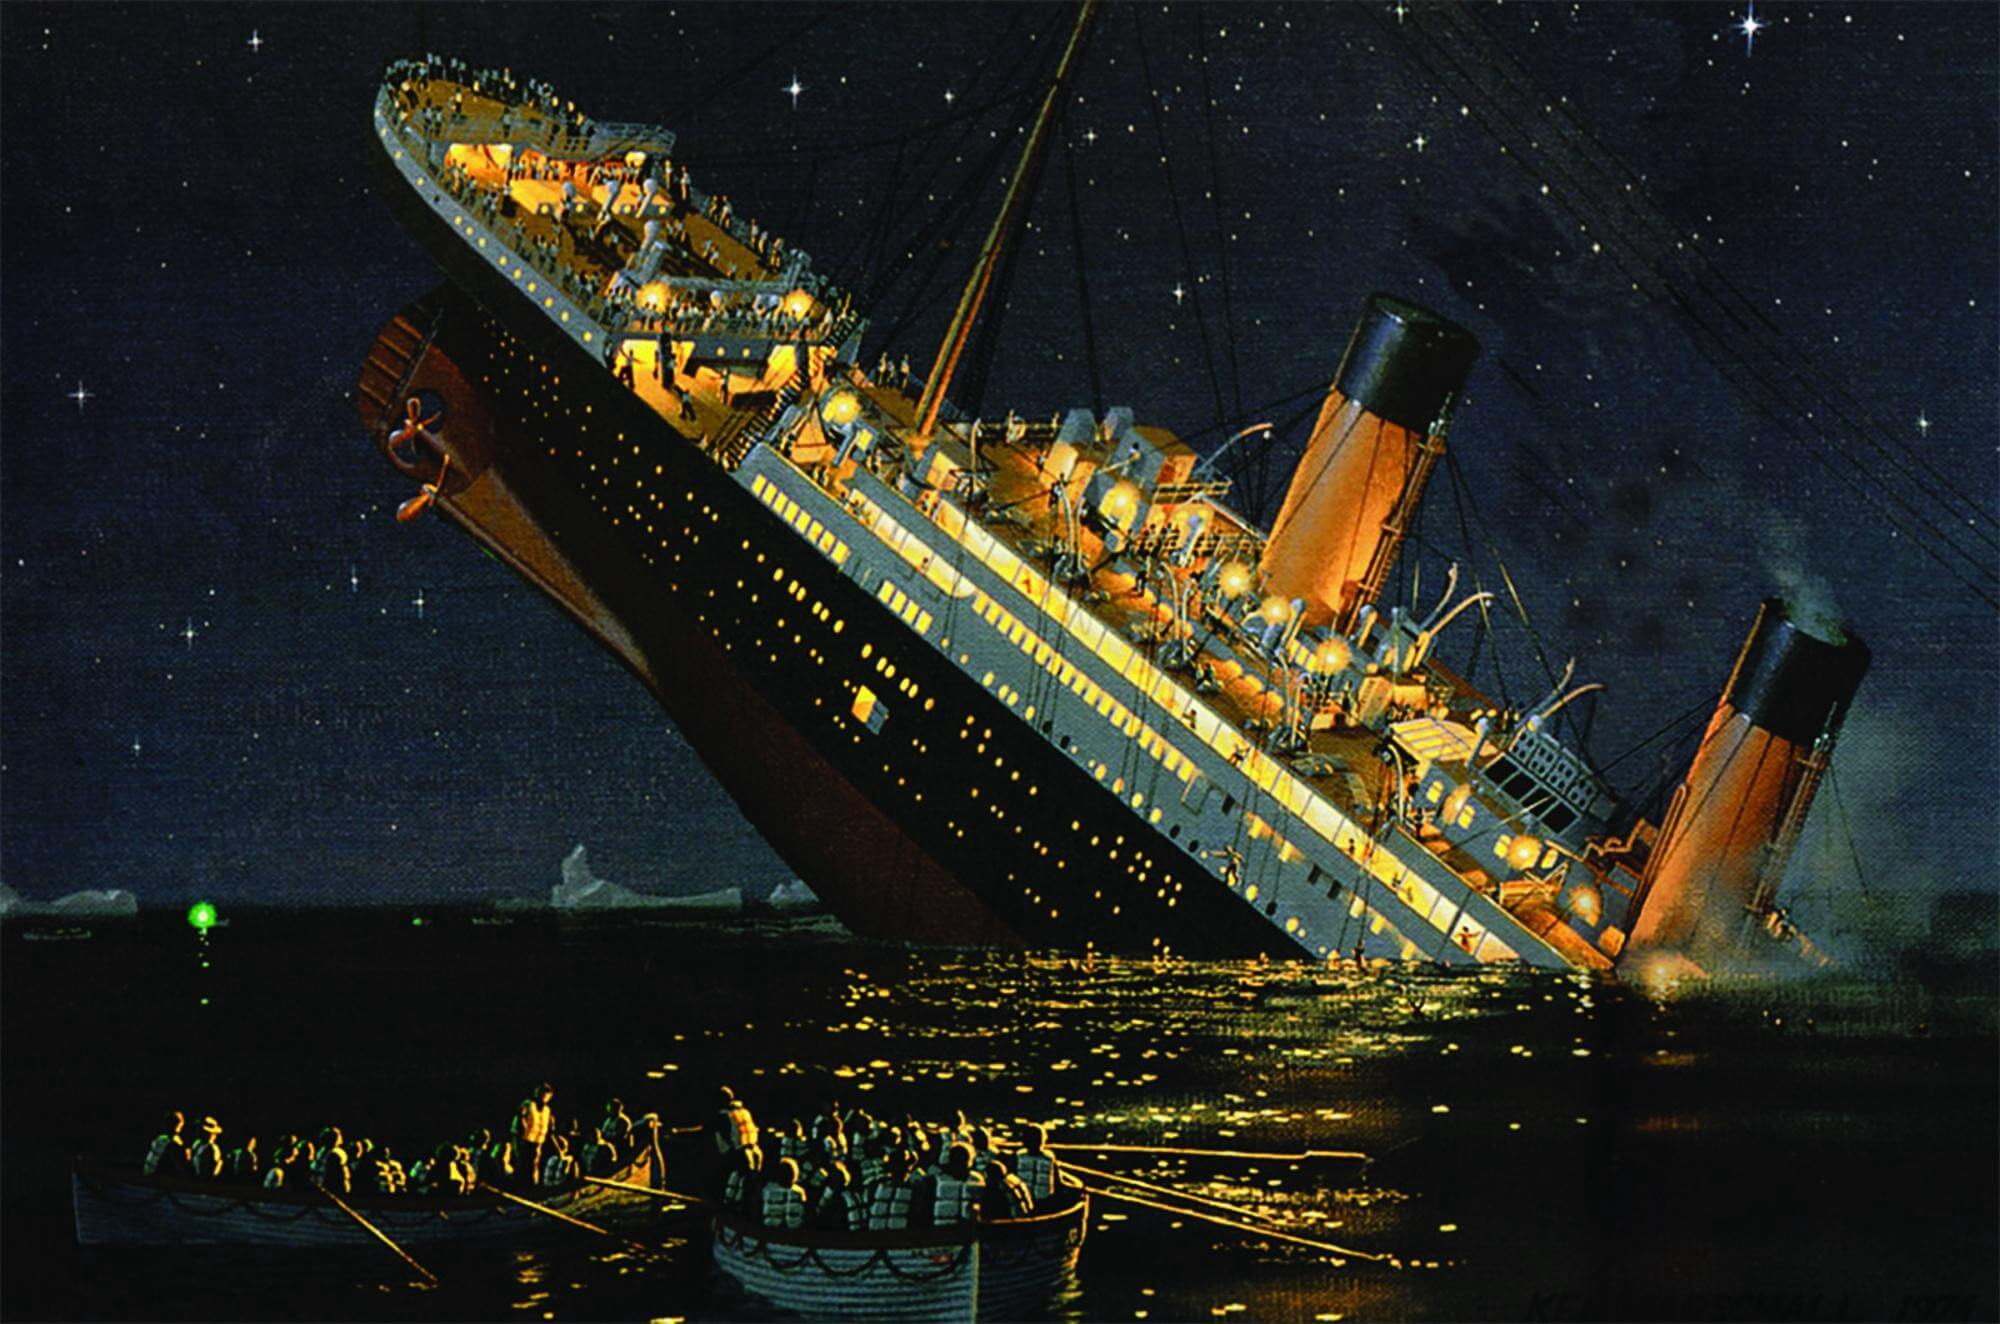

## **About Dataset**

*The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.*

## **Objective**

*Build a model that predicts whether a
passenger on the Titanic survived or not.*

In [1]:
# Import the needed libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read a csv file
df = pd.read_csv('/content/Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Get a quick info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Data Preprocessing Part**

In [4]:
# Detecting the null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Drop the column named Cabin
df = df.drop('Cabin',axis=1)

In [6]:
# Checking the Unique values of Embarked Column
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
# Checking the value counts of Embarked Column
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [8]:
# Filling the Null Value of Embarked Column using Mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [9]:
# Filling the Null Value of Age Column using Mean
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [10]:
# Dropping Name column due to String dtype
df = df.drop('Name',axis=1)

In [11]:
# Dropping Ticket column due to String dtype
df = df.drop('Ticket',axis=1)

In [12]:
# Checking the Unique values of Sex column
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [13]:
# Encoding the values of Sex column for further Processing
df['Sex'] = df['Sex'].map({'male':100,'female':101})

In [14]:
# Checking the Unique values of Embarked column
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [15]:
# Encoding the values of Embarked column for further Processing
df['Embarked'] = df['Embarked'].map({'S':0,'C':1,'Q':2})

# **Exploratory data analysis**

In [16]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,100,22.0,1,0,7.2500,0
1,2,1,1,101,38.0,1,0,71.2833,1
2,3,1,3,101,26.0,0,0,7.9250,0
3,4,1,1,101,35.0,1,0,53.1000,0
4,5,0,3,100,35.0,0,0,8.0500,0


# **Distribution of catogorical variables**

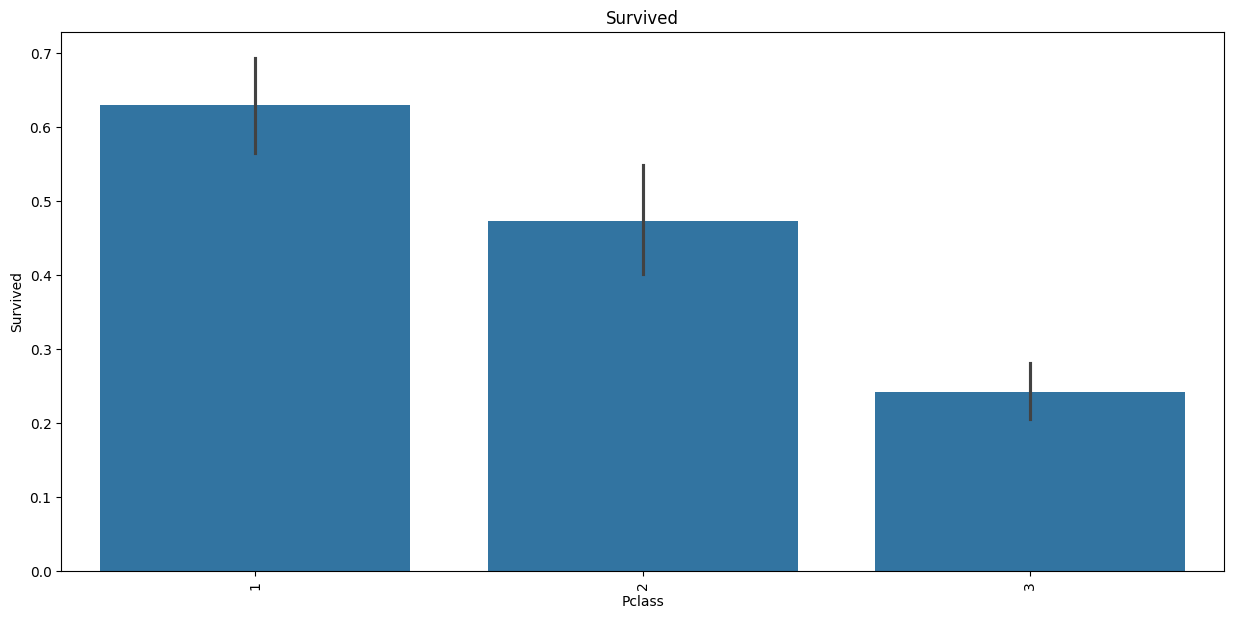

In [17]:
# Relationship b/w Pclass and Survived
plt.figure(figsize=(15,7))
sns.barplot(data=df, x='Pclass', y='Survived').set(title='Survived', xlabel='Pclass')
plt.xticks(rotation=90);

The above chart indicates that the significant portion of passengers have survived in 1st Class.

# **Distribution of Continuous variables**

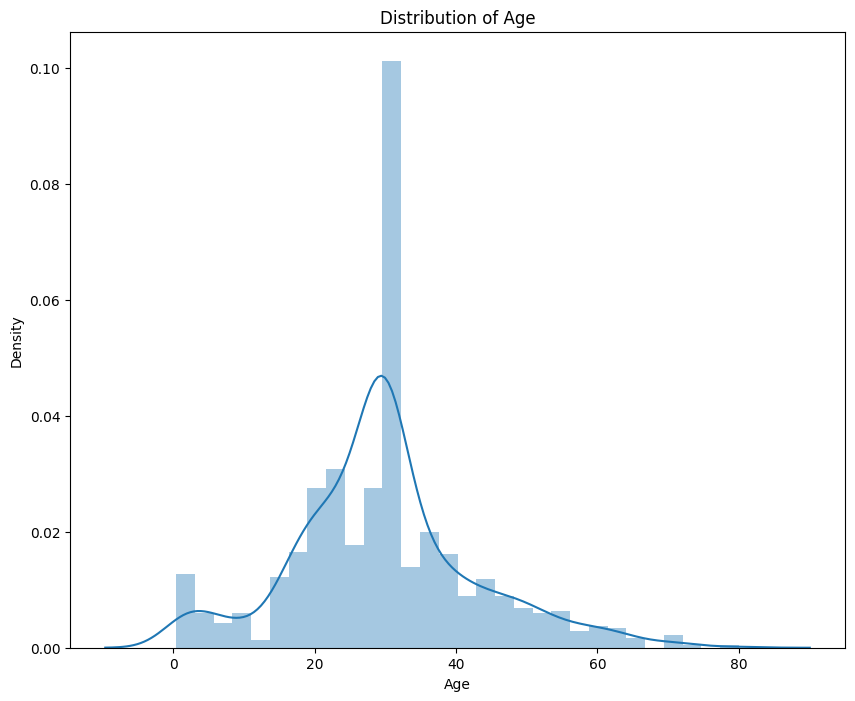

In [18]:
# Distribution of Age
plt.figure(figsize = (10,8))
sns.distplot(df['Age'], bins = 30).set(title = 'Distribution of Age')
plt.show()

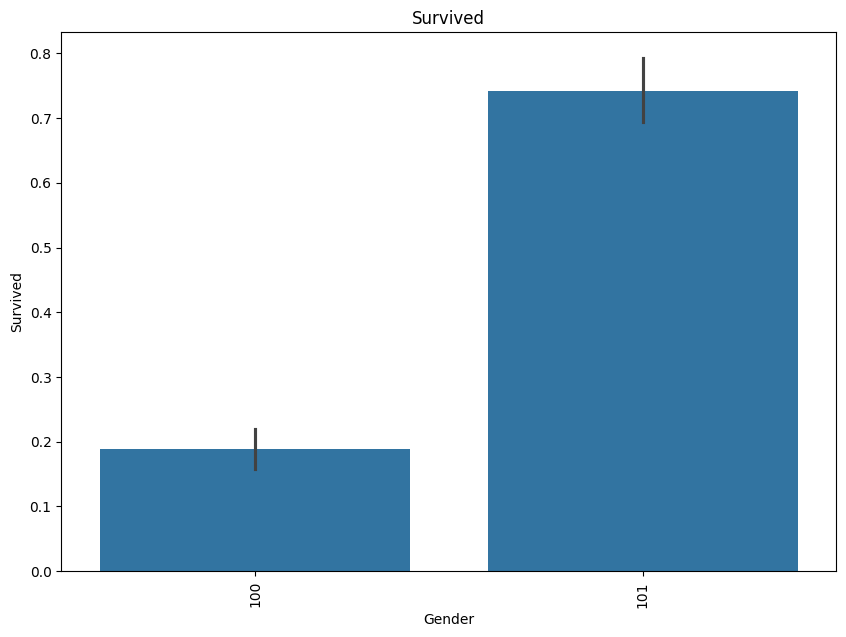

In [19]:
# Relationship b/w Sex and Survived
plt.figure(figsize=(10,7))                    # Relationship b/w Sex and Survived
sns.barplot(data=df, x='Sex', y='Survived').set(title='Survived', xlabel='Gender')
plt.xticks(rotation=90);

The above chart represents Female passengers has got survived more than the Male passengers.

<Axes: xlabel='Embarked', ylabel='count'>

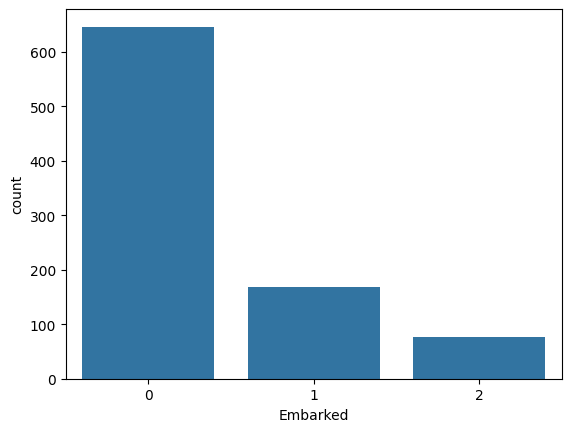

In [20]:
sns.countplot(x='Embarked',data=df)

This Chart highlights that the majority of passengers has been boarded at Southampton port.

<Axes: xlabel='Survived', ylabel='count'>

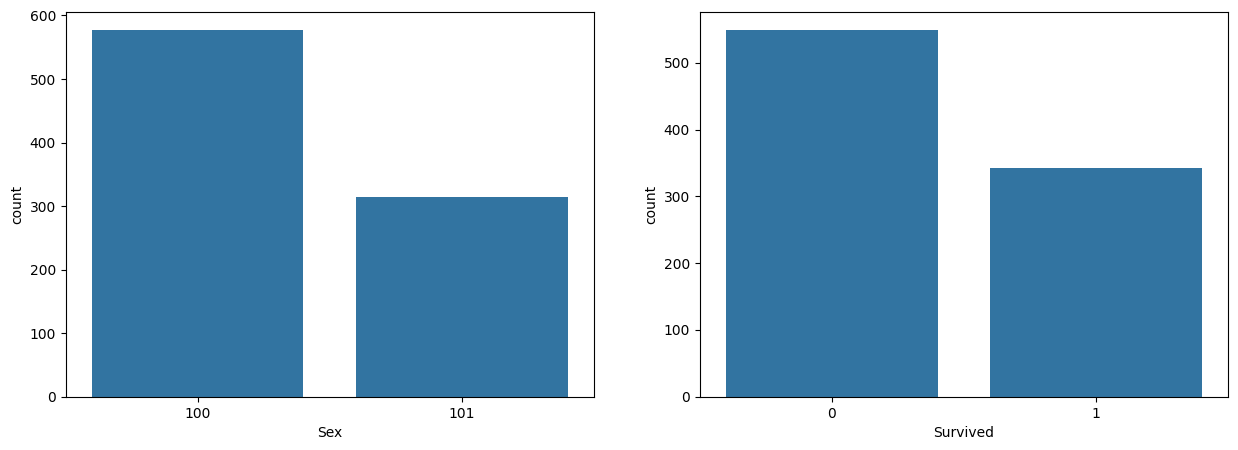

In [21]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Sex',data=df,ax = ax[0])
sns.countplot(x='Survived',data = df,ax=ax[1])

The first chart reveals that a significant portion of the passengers are males, while the second chart indicates the count of passengers who survived and not survived.

In [22]:
# Check Correlation for the DataFrame
df.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.033207,-0.057527,-0.001652,0.012658,-0.030467
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.069809,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.331339,0.083081,0.018443,-0.549500,0.045702
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.084153,0.114631,0.245489,0.182333,0.116569
Age,0.033207,-0.069809,-0.331339,-0.084153,1.000000,-0.232625,-0.179191,0.091566,0.007461
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.232625,1.000000,0.414838,0.159651,-0.059961
Parch,-0.001652,0.081629,0.018443,0.245489,-0.179191,0.414838,1.000000,0.216225,-0.078665
Fare,0.012658,0.257307,-0.549500,0.182333,0.091566,0.159651,0.216225,1.000000,0.062142
Embarked,-0.030467,0.106811,0.045702,0.116569,0.007461,-0.059961,-0.078665,0.062142,1.000000


[Text(0.5, 1.0, 'Relationship between Features')]

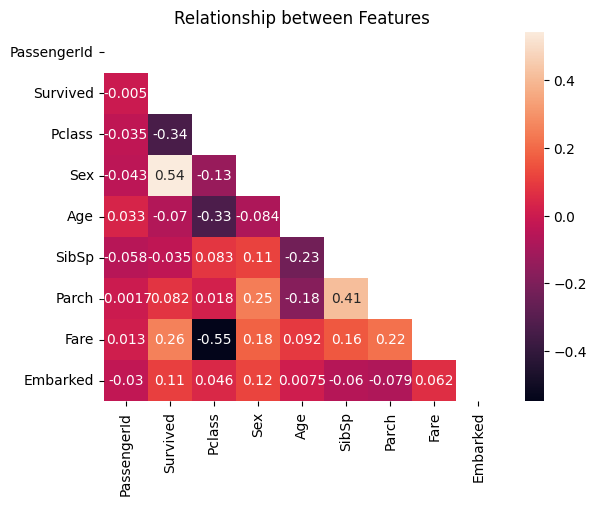

In [ ]:
# HeatMap for Correlation
sns.heatmap(df.corr(),annot = True,
           mask = np.triu(np.ones_like(df.corr()))).set(title='Relationship between Features')

In [23]:
# Separate the dataset into features(x) and target(y)
x = df.drop('Survived',axis=1)
y = df['Survived']

In [24]:
# Scaling 'x' column to improve accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

# **Train Test Split**

In [25]:
x_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Model Evaluation**

In [26]:
# Applying LogisticRegression Algorithm
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [27]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1])

In [29]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[89, 16],
       [20, 54]])

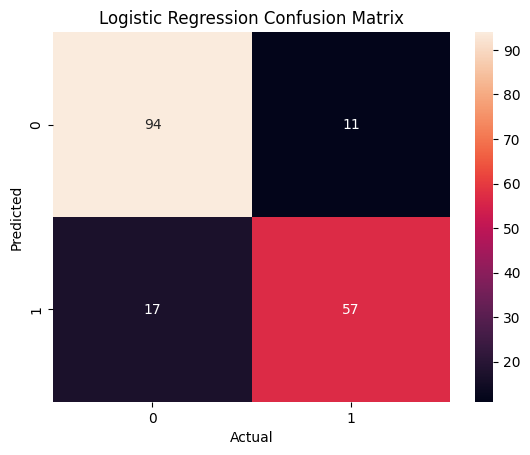

In [41]:
# HeatMap for Confusion Matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True).set(title='Logistic Regression Confusion Matrix',xlabel='Actual',ylabel='Predicted')
plt.show()

In [31]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.7988826815642458

In [32]:
# Checking Classification report of the Model
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [33]:
# Applying KNeighborsClassifier Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(3)
knn.fit(x_train,y_train)
y_pred = knn.predict(X_test)
knn.score(X_test,y_test)

0.8100558659217877

In [34]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8100558659217877

In [35]:
# Checking Confusion Matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[88, 17],
       [17, 57]])

In [36]:
# Checking Classification report of the Model
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



In [37]:
# Applying RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test)

0.8435754189944135

In [38]:
# Checking Accuracy of the Model
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8435754189944135

In [39]:
# Checking Confusion Matrix
confusion = confusion_matrix(y_test,y_pred)
confusion

array([[94, 11],
       [17, 57]])

# **Prediction**

In [40]:
# Sample details of a passenger
sample_measurements = np.array([2,1,1,101,38.0,0,71.2833,1])
result =list(model.predict([sample_measurements]))
# result
if result==[0]:
  print('The Passenger is Not Survived')
else:
  print('The Passenger is Survived')


The Passenger is Not Survived
